![Quran](https://1.bp.blogspot.com/--b1Tt8qhPEY/YRjfGOpX1JI/AAAAAAAA0bc/KtkkM5OWEX07l-yzqB5oBayvhgYRk_IxQCLcBGAsYHQ/w1200-h630-p-k-no-nu/IMG_20210815_172502_369.jpg)

# مشروع تحليل القرآن الكريم باستخدام Python
## بسم الله الرحمن الرحيم
الحمد لله، رب العالمين، والصلاة والسلام على نبينا محمد وعلى آله وصحبه أجمعين.

باستخدام هذا المشروع يأتي بهدف فهم وتحليل النصوص القرآنية التقنيات الحديثة للبرمجة. نعتبر هذا الجهد جزءًا من سعينا لفهم عظمة كتاب الله والاستفادة منه في حياتنا اليومية.

### الهدف العام
تسعى هذه الجهود إلى تحليل بعض الجوانب اللغوية والعلمية في القرآن الكريم باستخدام التقنيات الحديثة. نأمل أن يكون هذا المشروع خطوة نحو فهم أعمق لكلمات الله وإلهامنا للاقتراب من كتابه المجيد.

### الأهداف الخاصة
- التحليل اللغوي: دراسة عدد الآيات في كل سورة وتوزيع الكلمات.
- التحليل الثقافي: فهم توزيع بعض المفاهيم والكلمات الهامة في القرآن.
التحليل الديني: دراسة توزيع ذكر الأنبياء في النص القرآني.

نسأل الله أن يكون هذا العمل خالصًا لوجهه الكريم وأن يجعله خيرًا لنا وللمسلمين.ذكر بعض المعلومات العامةفى القرآن الكريم
والله ولي التوفيق.

---

# Quran Analysis Project using Python
In the Name of Allah, the Most Gracious, the Most Merciful
All praise is due to Allah, the Lord of all worlds, and blessings and peace upon our Prophet Muhammad and upon his family and companions.

This project comes with the aim of understanding and analyzing Quranic texts using modern programming techniques. We consider this effort as part of our journey to comprehend the greatness of the Book of Allah and to derive lessons for our daily lives.

### General Objective
This project seeks to analyze some linguistic and scientific aspects of the Quran using modern programming techniques. We hope that this project will be a step towards a deeper understanding of the words of Allah and an inspiration for us to get closer to His glorious book.

### Specific Goals
- Linguistic Analysis: Studying the number of verses in each surah and analyzing word distribution.
- Cultural Analysis: Understanding the distribution of key concepts and words in the Quran.
- Religious Analysis: Studying the distribution of mentions of prophets in the Quranic text.

We pray that this work is sincerely for the sake of Allah and that He makes it beneficial for us and all Muslims.
And Allah is the source of strength.



In [ ]:
!pip install python-bidi
!pip install arabic_reshaper

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
import numpy as np
from bidi.algorithm import get_display
import arabic_reshaper

# Set seaborn style for improved aesthetics
sns.set(style="darkgrid")

In [ ]:
# Function to generate table HTML with styled title
def generate_table_html_with_title(df, title):
    # Function to generate HTML for each part of the DataFrame
    def generate_combined_html(df_part):
        table_html = f"""
        <div style="width: 18%; float: left; padding: 0 10px;">
            {df_part.to_html(index=False)}
        </div>
        """
        return table_html

    # Split the DataFrame into five parts
    df_parts = np.array_split(df, 5)

    # Generate HTML for each part
    table_html_parts = [generate_combined_html(df_part) for df_part in df_parts]
    combined_html = "".join(table_html_parts)

    # Create a centered title with red text and white rounded background
    centered_title_html = f"""
    <div style="text-align: center; font-size: 24px; font-weight: bold; margin-bottom: 20px;
                color: red; background-color: white; padding: 10px; border-radius: 10px;">
        {title}
    </div>
    """

    return f"{centered_title_html}{combined_html}"

In [ ]:
# Number of verses in surahs
ar_surahs = {
    'الترتيب': range(1, 115),
    'السورة': [
        'الفاتحة', 'البقرة', 'آل عمرن', 'النساء', 'المائدة', 'الأنعام', 'الأعراف', 'الأنفال', 'التوبة', 'يونس',
        'هود', 'يوسف', 'الرعد', 'إبراهيم', 'الحجر', 'النحل', 'الإسراء', 'الكهف', 'مريم', 'طه', 'الأنبياء',
        'الحج', 'المؤمنون', 'النور', 'الفرقان', 'الشعراء', 'النمل', 'القصص', 'العنكبوت', 'الروم', 'لقمان',
        'السجدة', 'الأحزاب', 'سبأ', 'فاطر', 'يس', 'الصافات', 'ص', 'الزمر', 'غافر', 'فصلت', 'الشورى', 'الزخرف',
        'الدخان', 'الجاثية', 'الأحقاف', 'محمد', 'الفتح', 'الحجرات', 'ق', 'الذاريات', 'الطور', 'النجم', 'القمر',
        'الرحمن', 'الواقعة', 'الحديد', 'المجادلة', 'الحشر', 'الممتحنة', 'الصف', 'الجمعة', 'المنافقون', 'التغابن',
        'الطلاق', 'التحريم', 'الملك', 'القلم', 'الحاقة', 'المعارج', 'نوح', 'الجن', 'المزمل', 'المدثر', 'القيامة',
        'الإنسان', 'المرسلات', 'النبأ', 'النازعات', 'عبس', 'التكوير', 'الانفطار', 'المطففين', 'الانشقاق', 'البروج',
        'الطارق', 'الأعلى', 'الغاشية', 'الفجر', 'البلد', 'الشمس', 'الليل', 'الضحى', 'الشرح', 'التين', 'العلق',
        'القدر', 'البينة', 'الزلزلة', 'العاديات', 'القارعة', 'التكاثر', 'العصر', 'الهمزة', 'الفيل', 'قريش',
        'الماعون', 'الكوثر', 'الكافرون', 'النصر', 'المسد', 'الإخلاص', 'الفلق', 'الناس'
    ],
    'عدد الآيات': [
        7, 286, 200, 176, 120, 165, 206, 75, 129, 109, 123, 111, 43, 52, 99, 128, 111, 110, 98, 135, 112, 78,
        118, 64, 77, 227, 93, 88, 69, 60, 34, 30, 73, 54, 45, 83, 182, 88, 75, 85, 54, 53, 89, 59, 37, 35, 38,
        29, 18, 45, 60, 49, 62, 55, 78, 96, 29, 22, 24, 13, 14, 11, 11, 18, 12, 12, 30, 52, 52, 44, 28, 28, 20,
        56, 40, 31, 50, 40, 46, 42, 29, 19, 36, 25, 22, 17, 19, 26, 30, 20, 15, 21, 11, 8, 8, 19, 5, 8, 8, 11,
        11, 8, 3, 9, 5, 4, 7, 3, 6, 3, 5, 4, 5, 6
    ]
}

# Creating a DataFrame
ar_verses_count_df = pd.DataFrame(ar_surahs)
display(HTML(generate_table_html_with_title(ar_verses_count_df, 'فهرس القرآن الكريم')))

الترتيب,السورة,عدد الآيات
1,الفاتحة,7
2,البقرة,286
3,آل عمرن,200
4,النساء,176
5,المائدة,120
6,الأنعام,165
7,الأعراف,206
8,الأنفال,75
9,التوبة,129
10,يونس,109


In [ ]:
# Number of verses in surahs
en_surahs = {
    'Order': list(range(1, 115)),
    'Surah': [
        'Al-Fatiha', 'Al-Baqarah', 'Aal-E-Imran', 'An-Nisa', 'Al-Ma\'idah', 'Al-An\'am', 'Al-A\'raf', 'Al-Anfal', 'At-Tawbah', 'Yunus',
        'Hud', 'Yusuf', 'Ar-Ra\'d', 'Ibrahim', 'Al-Hijr', 'An-Nahl', 'Al-Isra', 'Al-Kahf', 'Maryam', 'Taha', 'Al-Anbiya',
        'Al-Hajj', 'Al-Mu\'minun', 'An-Nur', 'Al-Furqan', 'Ash-Shu\'ara', 'An-Naml', 'Al-Qasas', 'Al-Ankabut', 'Ar-Rum', 'Luqman',
        'As-Sajda', 'Al-Ahzab', 'Sabaa', 'Fatir', 'Yasin', 'As-Saffat', 'Sad', 'Az-Zumar', 'Ghafir', 'Fussilat', 'Ash-Shura', 'Az-Zukhruf',
        'Ad-Dukhan', 'Al-Jathiya', 'Al-Ahqaf', 'Muhammad', 'Al-Fath', 'Al-Hujurat', 'Qaf', 'Adh-Dhariyat', 'At-Tur', 'An-Najm', 'Al-Qamar',
        'Ar-Rahman', 'Al-Waqi\'a', 'Al-Hadid', 'Al-Mujadila', 'Al-Hashr', 'Al-Mumtahina', 'As-Saff', 'Al-Jumu\'a', 'Al-Munafiqun', 'At-Taghabun',
        'At-Talaq', 'At-Tahrim', 'Al-Mulk', 'Al-Qalam', 'Al-Haaqqa', 'Al-Ma\'arij', 'Nuh', 'Al-Jinn', 'Al-Muzzammil', 'Al-Muddathir', 'Al-Qiyama',
        'Al-Insan', 'Al-Mursalat', 'An-Naba', 'An-Nazi\'at', 'Abasa', 'At-Takwir', 'Al-Infitar', 'Al-Mutaffifin', 'Al-Inshiqaq', 'Al-Buruj',
        'At-Tariq', 'Al-Ala', 'Al-Ghashiya', 'Al-Fajr', 'Al-Balad', 'Ash-Shams', 'Al-Layl', 'Adh-Dhuha', 'Ash-Sharh', 'At-Tin', 'Al-Alaq',
        'Al-Qadr', 'Al-Bayyina', 'Az-Zalzalah', 'Al-Adiyat', 'Al-Qari\'a', 'At-Takathur', 'Al-Asr', 'Al-Humazah', 'Al-Fil', 'Quraish',
        'Al-Ma\'un', 'Al-Kawthar', 'Al-Kafirun', 'An-Nasr', 'Al-Masad', 'Al-Ikhlas', 'Al-Falaq', 'An-Nas'
    ],
    'Number of Verses': [
        7, 286, 200, 176, 120, 165, 206, 75, 129, 109, 123, 111, 43, 52, 99, 128, 111, 110, 98, 135, 112, 78,
        118, 64, 77, 227, 93, 88, 69, 60, 34, 30, 73, 54, 45, 83, 182, 88, 75, 85, 54, 53, 89, 59, 37, 35, 38,
        29, 18, 45, 60, 49, 62, 55, 78, 96, 29, 22, 24, 13, 14, 11, 11, 18, 12, 12, 30, 52, 52, 44, 28, 28, 20,
        56, 40, 31, 50, 40, 46, 42, 29, 19, 36, 25, 22, 17, 19, 26, 30, 20, 15, 21, 11, 8, 8, 19, 5, 8, 8, 11,
        11, 8, 3, 9, 5, 4, 7, 3, 6, 3, 5, 4, 5, 6
    ]
}

# Creating a DataFrame
en_verses_count_df = pd.DataFrame(en_surahs)
display(HTML(generate_table_html_with_title(en_verses_count_df, 'Index of the Holy Quran')))

Order,Surah,Number of Verses
1,Al-Fatiha,7
2,Al-Baqarah,286
3,Aal-E-Imran,200
4,An-Nisa,176
5,Al-Ma'idah,120
6,Al-An'am,165
7,Al-A'raf,206
8,Al-Anfal,75
9,At-Tawbah,129
10,Yunus,109


In [ ]:
# Function to generate card HTML
def generate_card(title, value):
    card_html = f"""
    <div style="width: 180px; margin-bottom: 20px; display: flex; flex-direction: column; align-items: center; position: relative;
    border: 2px solid #e74c3c; border-radius: 10px; padding: 15px; background-color: #fff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <h2 style="color: #e74c3c; font-size: 20px; margin-bottom: 10px;">{title}</h2>
        <p style="color: #333; font-size: 18px; margin: 0;">{value}</p>
        <div style="content: ''; position: absolute; top: 0; right: -10px; bottom: 0; width: 1px; background-color: #ddd; margin: 0 10px;"></div>
    </div>
    """
    return card_html

# Function to generate card container HTML
def generate_card_container(cards_html):
    container_html = f"""
    <div style="display: flex; flex-wrap: wrap; justify-content: center; gap: 20px; background-color: #f5f5f5; padding: 20px;
    border-radius: 15px; box-shadow: 0 0 20px rgba(0, 0, 0, 0.2); margin: 20px">
        {cards_html}
    </div>
    """
    return container_html

# Generating cards
ar_cards_set_1 = [
    generate_card("سور القرآن", "114"),
    generate_card("أجزاء القرآن", "30"),
    generate_card("أحزاب القرآن", "60"),
    generate_card("سجدات القرآن", "15"),
]

ar_cards_set_2 = [
    generate_card("بسملات القرآن", "114"),
    generate_card("أحرف القرآن", "323015"),
    generate_card("كلمات القرآن", "77439"),
    generate_card("آيات القرآن", "6236"),
]

en_cards_set_1 = [
    generate_card("Surahs of the Quran", "114"),
    generate_card("Sections of the Quran", "30"),
    generate_card("Chapters of the Quran", "60"),
    generate_card("Prostrations in the Quran", "15"),
]

en_cards_set_2 = [
    generate_card("Opening Phrases of the Quran", "114"),
    generate_card("Letters in the Quran", "323015"),
    generate_card("Words in the Quran", "77439"),
    generate_card("Verses in the Quran", "6236"),
]


# Generating card containers
container_html_set_1 = generate_card_container("".join(ar_cards_set_1))
container_html_set_2 = generate_card_container("".join(ar_cards_set_2))
container_html_set_3 = generate_card_container("".join(en_cards_set_1))
container_html_set_4 = generate_card_container("".join(en_cards_set_2))

In [ ]:
# Displaying the HTML content for Arabic Cards
display(HTML(container_html_set_1))
display(HTML(container_html_set_2))

In [ ]:
# Displaying the HTML content for English Cards
display(HTML(container_html_set_3))
display(HTML(container_html_set_4))

In [ ]:
# Sort the DataFrame by the number of verses in descending order
sorted_df = ar_verses_count_df.sort_values(by='عدد الآيات', ascending=False)
top_10_surahs = sorted_df.head(10)

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(top_10_surahs, x='عدد الآيات', y='السورة', text='عدد الآيات',
             labels={'عدد الآيات': 'عدد الآيات', 'السورة': 'السورة'},
             title='أعلى 10 سور بأكبر عدد من الآيات',
             color='عدد الآيات', color_continuous_scale='reds')

# Customize the layout
fig.update_layout(yaxis_categoryorder='total ascending', xaxis_title='عدد الآيات', yaxis_title='السورة',showlegend=False)
fig.show()

In [ ]:
# Sort the DataFrame by the number of verses in descending order
sorted_df = en_verses_count_df.sort_values(by='Number of Verses', ascending=False)
top_10_surahs = sorted_df.head(10)

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(top_10_surahs, x='Number of Verses', y='Surah', text='Number of Verses',
             labels={'Number of Verses': 'Number of Verses', 'Surah': 'Surah'},
             title='Top 10 Surahs with the Highest Number of Verses',
             color='Number of Verses', color_continuous_scale='reds')

# Customize the layout
fig.update_layout(yaxis_categoryorder='total ascending', xaxis_title='Number of Verses', yaxis_title='Surah', showlegend=False)
fig.show()

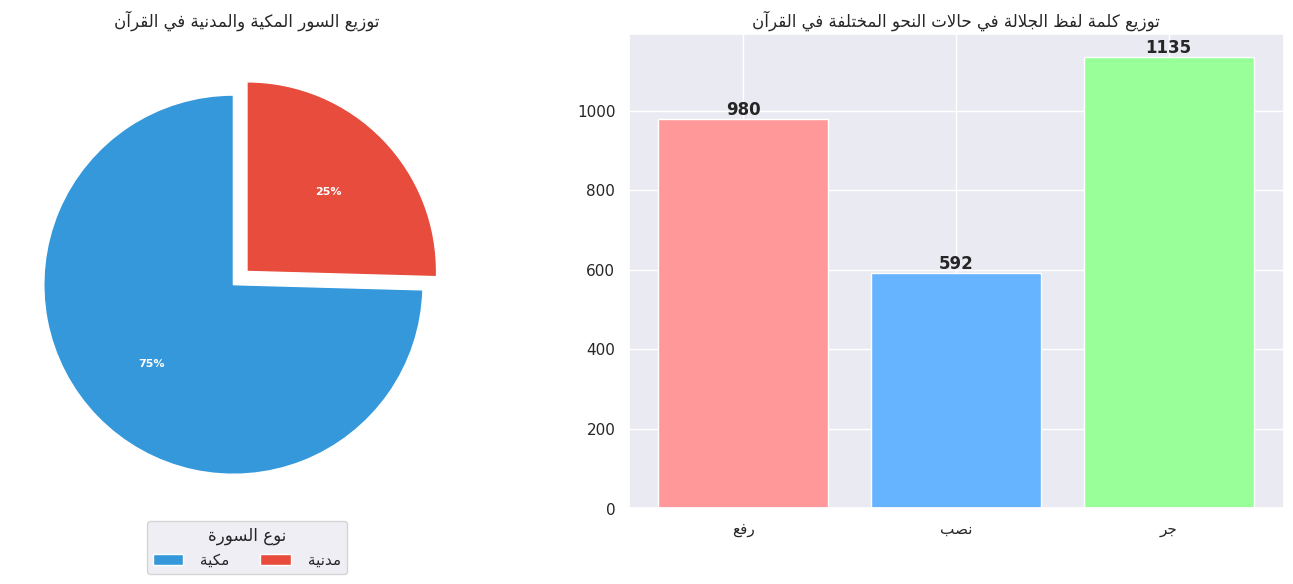

In [ ]:
# Display the distribution of the Surahs in the Quran
labels_surah = ['مكية ', 'مدنية ']
counts_surah = [85, 29]

# Reshape Arabic labels for Surahs
reshaped_labels_surah = [get_display(arabic_reshaper.reshape(label)) for label in labels_surah]

# Create a 1x2 grid (1 row, 2 columns) for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Surah distribution
wedges_surah, _, autotexts_surah = ax1.pie(counts_surah, labels=reshaped_labels_surah, autopct='%1.0f%%', startangle=90, explode=(0.1, 0),
                                           colors=['#3498db', '#e74c3c'], textprops=dict(color="w"))
legend_surah = ax1.legend(wedges_surah, reshaped_labels_surah, loc="upper center", bbox_to_anchor=(0.5, -0.01), ncol=2)
plt.setp(autotexts_surah, size=8, weight="bold")

title_text_surah = 'نوع السورة'
legend_surah.set_title(get_display(arabic_reshaper.reshape(title_text_surah)))
title_text_surah_distribution = 'توزيع السور المكية والمدنية في القرآن'
ax1.set_title(get_display(arabic_reshaper.reshape(title_text_surah_distribution)))

# Bar plot for Word Distribution
labels_word = ['رفع', 'نصب', 'جر']
sizes_word = [980, 592, 1135]

# Reshape Arabic labels for Word Distribution
reshaped_labels_word = [get_display(arabic_reshaper.reshape(label)) for label in labels_word]

# Bar plot with data labels for Word Distribution
bars_word = ax2.bar(reshaped_labels_word, sizes_word, color=['#ff9999', '#66b3ff', '#99ff99'])

# Display data labels on the bars for Word Distribution
for bar in bars_word:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom', fontweight='bold')

title_text_word_distribution = 'توزيع كلمة لفظ الجلالة في حالات النحو المختلفة في القرآن'
ax2.set_title(get_display(arabic_reshaper.reshape(title_text_word_distribution)))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

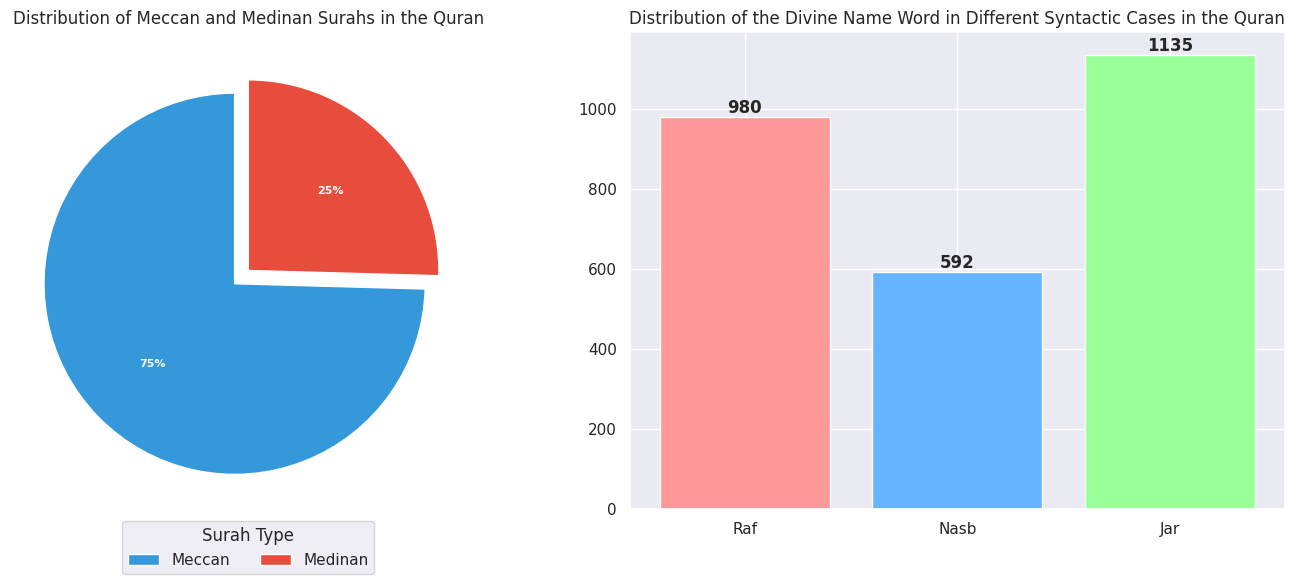

In [ ]:
# Display the distribution of the Surahs in the Quran
labels_surah = ['Meccan', 'Medinan']
counts_surah = [85, 29]

# Create a 1x2 grid (1 row, 2 columns) for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Surah distribution
wedges_surah, _, autotexts_surah = ax1.pie(counts_surah, labels=labels_surah, autopct='%1.0f%%', startangle=90, explode=(0.1, 0),
                                           colors=['#3498db', '#e74c3c'], textprops=dict(color="w"))
legend_surah = ax1.legend(wedges_surah, labels_surah, loc="upper center", bbox_to_anchor=(0.5, -0.01), ncol=2)
plt.setp(autotexts_surah, size=8, weight="bold")

legend_surah.set_title('Surah Type')
ax1.set_title('Distribution of Meccan and Medinan Surahs in the Quran')

# Bar plot for Word Distribution
labels_word = ['Raf', 'Nasb', 'Jar']
sizes_word = [980, 592, 1135]

# Bar plot with data labels for Word Distribution
bars_word = ax2.bar(labels_word, sizes_word, color=['#ff9999', '#66b3ff', '#99ff99'])

# Display data labels on the bars for Word Distribution
for bar in bars_word:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Distribution of the Divine Name Word in Different Syntactic Cases in the Quran')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Chapters data
ar_verses_of_chapters = {
    'الجزء': np.arange(1, 31).repeat(2),
    'الحزب': list(range(1, 61)),
    'الربع الأول': [32, 17, 16, 16, 10, 18, 20, 15, 12, 12, 15, 14, 15, 23, 16, 30, 29, 18, 20, 12, 18, 27, 18, 24, 24, 16, 48, 24, 22, 29, 24, 54, 28, 18, 35, 14, 32, 70, 26, 25, 24, 23, 20, 22, 32, 58, 21, 25, 20, 33, 20, 12, 53, 78, 13, 14, 30, 47, 86, 75],
    'الربع الثاني': [18, 14, 19, 14, 9, 19, 20, 15, 22, 14, 14, 10, 12, 15, 14, 16, 25, 18, 15, 14, 11, 18, 17, 22, 24, 18, 51, 15, 27, 15, 33, 28, 22, 19, 39, 18, 25, 47, 23, 13, 30, 20, 9, 23, 45, 31, 23, 28, 14, 49, 24, 13, 51, 74, 19, 26, 52, 57, 71, 67],
    'الربع الثالث': [16, 18, 12, 10, 11, 23, 20, 11, 16, 21, 11, 16, 24, 21, 10, 18, 14, 21, 18, 15, 18, 19, 20, 23, 15, 18, 29, 21, 20, 19, 37, 28, 32, 22, 44, 12, 51, 26, 17, 25, 23, 17, 23, 26, 61, 44, 20, 16, 24, 54, 23, 31, 45, 37, 20, 12, 70, 58, 55, 67],
    'الربع الرابع': [15, 18, 14, 10, 18, 18, 18, 12, 14, 13, 15, 15, 23, 16, 15, 23, 15, 19, 15, 18, 15, 25, 23, 23, 14, 25, 21, 18, 29, 24, 40, 25, 30, 19, 20, 20, 59, 29, 22, 20, 28, 13, 14, 32, 62, 24, 20, 22, 26, 26, 23, 49, 47, 14, 21, 12, 54, 63, 64, 79],
    'الإجمالي': [81, 67, 61, 50, 48, 78, 78, 53, 64, 60, 55, 55, 74, 75, 55, 87, 83, 76, 68, 59, 62, 89, 78, 92, 77, 77, 149, 78, 98, 87, 134, 135, 112, 78, 138, 64, 167, 172, 88, 83, 105, 73, 66, 103, 200, 157, 84, 91, 84, 162, 90, 105, 196, 203, 73, 64, 206, 225, 276, 288]
}

# Create a dataframe
ar_chapters_df = pd.DataFrame(ar_verses_of_chapters)
ar_chapters_df.head(10)

,الجزء,الحزب,الربع الأول,الربع الثاني,الربع الثالث,الربع الرابع,الإجمالي
0,1,1,32,18,16,15,81
1,1,2,17,14,18,18,67
2,2,3,16,19,12,14,61
3,2,4,16,14,10,10,50
4,3,5,10,9,11,18,48
5,3,6,18,19,23,18,78
6,4,7,20,20,20,18,78
7,4,8,15,15,11,12,53
8,5,9,12,22,16,14,64
9,5,10,12,14,21,13,60


In [ ]:
# Chapters data
en_verses_of_chapters = {
    'Section': np.arange(1, 31).repeat(2),
    'Chapter': list(range(1, 61)),
    'First Quarter': [32, 17, 16, 16, 10, 18, 20, 15, 12, 12, 15, 14, 15, 23, 16, 30, 29, 18, 20, 12, 18, 27, 18, 24, 24, 16, 48, 24, 22, 29, 24, 54, 28, 18, 35, 14, 32, 70, 26, 25, 24, 23, 20, 22, 32, 58, 21, 25, 20, 33, 20, 12, 53, 78, 13, 14, 30, 47, 86, 75],
    'Second Quarter': [18, 14, 19, 14, 9, 19, 20, 15, 22, 14, 14, 10, 12, 15, 14, 16, 25, 18, 15, 14, 11, 18, 17, 22, 24, 18, 51, 15, 27, 15, 33, 28, 22, 19, 39, 18, 25, 47, 23, 13, 30, 20, 9, 23, 45, 31, 23, 28, 14, 49, 24, 13, 51, 74, 19, 26, 52, 57, 71, 67],
    'Third Quarter': [16, 18, 12, 10, 11, 23, 20, 11, 16, 21, 11, 16, 24, 21, 10, 18, 14, 21, 18, 15, 18, 19, 20, 23, 15, 18, 29, 21, 20, 19, 37, 28, 32, 22, 44, 12, 51, 26, 17, 25, 23, 17, 23, 26, 61, 44, 20, 16, 24, 54, 23, 31, 45, 37, 20, 12, 70, 58, 55, 67],
    'Fourth Quarter': [15, 18, 14, 10, 18, 18, 18, 12, 14, 13, 15, 15, 23, 16, 15, 23, 15, 19, 15, 18, 15, 25, 23, 23, 14, 25, 21, 18, 29, 24, 40, 25, 30, 19, 20, 20, 59, 29, 22, 20, 28, 13, 14, 32, 62, 24, 20, 22, 26, 26, 23, 49, 47, 14, 21, 12, 54, 63, 64, 79],
    'Total': [81, 67, 61, 50, 48, 78, 78, 53, 64, 60, 55, 55, 74, 75, 55, 87, 83, 76, 68, 59, 62, 89, 78, 92, 77, 77, 149, 78, 98, 87, 134, 135, 112, 78, 138, 64, 167, 172, 88, 83, 105, 73, 66, 103, 200, 157, 84, 91, 84, 162, 90, 105, 196, 203, 73, 64, 206, 225, 276, 288]
}

# Create a dataframe
en_chapters_df = pd.DataFrame(en_verses_of_chapters)
en_chapters_df.head(10)

,Section,Chapter,First Quarter,Second Quarter,Third Quarter,Fourth Quarter,Total
0,1,1,32,18,16,15,81
1,1,2,17,14,18,18,67
2,2,3,16,19,12,14,61
3,2,4,16,14,10,10,50
4,3,5,10,9,11,18,48
5,3,6,18,19,23,18,78
6,4,7,20,20,20,18,78
7,4,8,15,15,11,12,53
8,5,9,12,22,16,14,64
9,5,10,12,14,21,13,60


In [ ]:
# Display the number of verses in each chapter
fig = px.line(ar_chapters_df, x='الحزب', y='الإجمالي', title='إجمالي عدد الآيات في كل حزب من القرآن')
fig.update_layout(
    xaxis=dict(title='الحزب'),
    yaxis=dict(title='إجمالي عدد الآيات'),
    hovermode='x',
    template="plotly_dark"
)
fig.show()

In [ ]:
# Display the number of verses in each chapter
fig = px.line(en_chapters_df, x='Chapter', y='Total', title='Total Number of Verses in Each Chapter of the Quran')
fig.update_layout(
    xaxis=dict(title='Chapter'),
    yaxis=dict(title='Total Number of Verses'),
    hovermode='x',
    template="plotly_dark"
)
fig.show()

In [ ]:

# Plotting with Plotly
fig = px.area(ar_chapters_df, x='الحزب', y=['الربع الأول', 'الربع الثاني', 'الربع الثالث',	'الربع الرابع'],
              title='توزيع الآيات في كل ربع من القرآن', color_discrete_sequence=['blue', 'orange', 'green', 'red'])
fig.update_layout(
    xaxis=dict(title='الحزب'),
    yaxis=dict(title='إجمالي عدد الآيات'),
    hovermode='x',
    template="plotly_dark",
    legend=dict(orientation='h', x=0.4, y=-0.2, title=None)
)
fig.show()

In [ ]:
# Plotting with Plotly
fig = px.area(en_chapters_df, x='Chapter', y=['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'],
              title='Distribution of Verses in Each Quarter of the Quran', color_discrete_sequence=['blue', 'orange', 'green', 'red'])
fig.update_layout(
    xaxis=dict(title='Chapter'),
    yaxis=dict(title='Total Number of Verses'),
    hovermode='x',
    template="plotly_dark",
    legend=dict(orientation='h', x=0.3, y=-0.2, title=None)
)
fig.show()

In [ ]:
# Group by "Section" and find the top total values
top_sections = ar_chapters_df.groupby('الجزء').sum().sort_values(by='الإجمالي', ascending=False)
top_sections = top_sections.reset_index()

# Create an interactive horizontal bar plot with Plotly Express
fig = px.bar(top_sections, x='الإجمالي', y='الجزء', orientation='h', text='الإجمالي',
             title='عدد الآيات فى كل جزء من القرآن الكريم', color_continuous_scale='skyblue')

# Customize the layout
fig.update_layout(xaxis_title='عدد الآيات', yaxis_title='الجزء', showlegend=False)
fig.show()

In [ ]:
# Group by "Part" and find the top total values
top_sections = en_chapters_df.groupby('Section').sum().sort_values(by='Total', ascending=False)
top_sections = top_sections.reset_index()

# Create an interactive horizontal bar plot with Plotly Express
fig = px.bar(top_sections, x='Total', y='Section', orientation='h', text='Total',
             title='Number of Verses in Each Part of the Holy Quran', color_continuous_scale='skyblue')

# Customize the layout
fig.update_layout(xaxis_title='Number of Verses', yaxis_title='Part', showlegend=False)
fig.show()

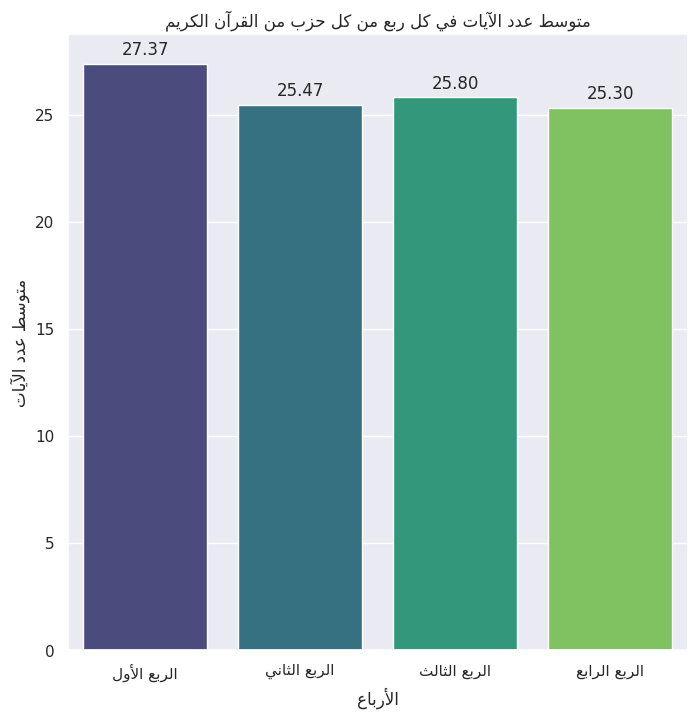

In [ ]:
# Reshape Arabic labels
title_text = 'متوسط عدد الآيات في كل ربع من كل حزب من القرآن الكريم'
reshaped_title = get_display(arabic_reshaper.reshape(title_text))
quarter_averages = ar_chapters_df[['الربع الأول', 'الربع الثاني', 'الربع الثالث', 'الربع الرابع']].mean()
reshaped_quarters = [get_display(arabic_reshaper.reshape(str(quarter))) for quarter in quarter_averages.index]

# Create a bar plot with a color palette
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=reshaped_quarters, y=quarter_averages.values, palette="viridis")
plt.title(reshaped_title)
plt.xlabel(get_display(arabic_reshaper.reshape('الأرباع')))
plt.ylabel(get_display(arabic_reshaper.reshape('متوسط عدد الآيات')))

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

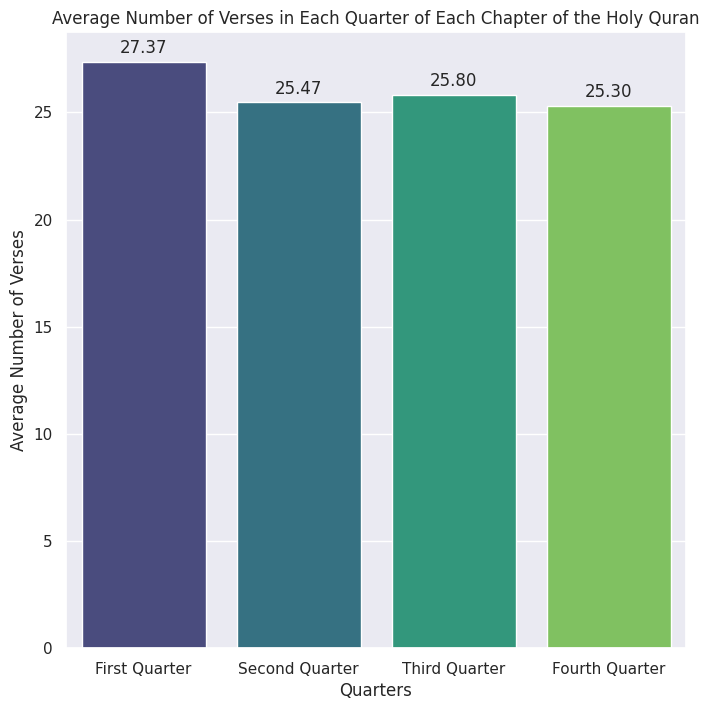

In [ ]:
# Reshape English labels
quarter_averages = en_chapters_df[['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter']].mean()

# Create a bar plot with a color palette
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=quarter_averages.index, y=quarter_averages.values, palette="viridis")
plt.title('Average Number of Verses in Each Quarter of Each Chapter of the Holy Quran')
plt.xlabel('Quarters')
plt.ylabel('Average Number of Verses')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
# Assuming df is your DataFrame with columns 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'
fig = px.box(ar_chapters_df, y=['الربع الأول', 'الربع الثاني', 'الربع الثالث', 'الربع الرابع'],
             labels={'variable': 'الربع', 'value': 'عدد الآيات'},
             title='توزيع الآيات في كل ربع من كل حزب من القرآن الكريم')
fig.show()

In [ ]:
# Assuming df is your DataFrame with columns 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'
fig = px.box(en_chapters_df, y=['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'],
             labels={'variable': 'Quarter', 'value': 'Number of Verses'},
             title='Distribution of Verses in Each Quarter of Each Chapter of the Holy Quran')
fig.show()

In [ ]:
# Data for the frequency of Arabic letters
ar_letters = {
    'اسم الحرف': ['الهمزة', 'حرف الألف', 'حرف الباء', 'التاء المربوطة', 'حرف التاء', 'حرف الثاء', 'حرف الجيم', 'حرف الحاء', 'حرف الخاء', 'حرف الدال', 'حرف الذال', 'حرف الراء', 'حرف الزاي', 'حرف السين', 'حرف الشين', 'حرف الصاد', 'حرف الضاد', 'حرف الطاء', 'حرف الظاء', 'حرف العين', 'حرف الغين', 'حرف الفاء', 'حرف القاف', 'حرف الكاف', 'حرف اللام', 'حرف الميم', 'حرف النون', 'حرف الهاء', 'حرف الواو', 'حرف الياء'],
    'عدد مرات التِكرار': [2788, 52656, 11491, 2344, 10520, 1414, 3317, 4140, 2497, 5991, 4932, 12403, 1599, 6010, 2124, 2074, 1686, 1273, 853, 9405, 1221, 8747, 7034, 10497, 38102, 26734, 27268, 14850, 25675, 25199]
}

# Creating a DataFrame
ar_letters_df = pd.DataFrame(ar_letters)
display(HTML(generate_table_html_with_title(ar_letters_df, 'عدد مرات تكرار الحروف فى القرآن الكريم')))

اسم الحرف,عدد مرات التِكرار
الهمزة,2788
حرف الألف,52656
حرف الباء,11491
التاء المربوطة,2344
حرف التاء,10520
حرف الثاء,1414
اسم الحرف,عدد مرات التِكرار
حرف الجيم,3317
حرف الحاء,4140
حرف الخاء,2497


In [ ]:
# Data for the frequency of Arabic letters
en_letters = {
    'Letter Name': ['Hamzah', 'Alif', 'Ba', 'Ta Marbuta', 'Ta', 'Tha', 'Jeem', 'Ha', 'Kha', 'Dal', 'Dhal', 'Ra', 'Zay', 'Seen', 'Sheen', 'Sad', 'Dad', 'Ta', 'Za', 'Ayn', 'Ghayn', 'Fa', 'Qaf', 'Kaf', 'Lam', 'Meem', 'Noon', 'Ha', 'Waw', 'Ya'],
    'Frequency': [2788, 52656, 11491, 2344, 10520, 1414, 3317, 4140, 2497, 5991, 4932, 12403, 1599, 6010, 2124, 2074, 1686, 1273, 853, 9405, 1221, 8747, 7034, 10497, 38102, 26734, 27268, 14850, 25675, 25199]
}

# Creating a DataFrame
en_letters_df = pd.DataFrame(en_letters)
display(HTML(generate_table_html_with_title(en_letters_df, 'Frequency of Letters in the Holy Quran')))

Letter Name,Frequency
Hamzah,2788
Alif,52656
Ba,11491
Ta Marbuta,2344
Ta,10520
Tha,1414
Letter Name,Frequency
Jeem,3317
Ha,4140
Kha,2497


In [ ]:
# Data for Numerical Miracles in the Quran
ar_words = {
    'الكلمة': ['الدنيا', 'الآخرة', 'الملائكة', 'الشياطين', 'الحياة', 'الموت', 'النفع', 'الفساد', 'الناس', 'الرسل', 'السلام', 'الطيبات', 'المحبة', 'الطاعة',
               'المصيبة', 'الشكر', 'الإنفاق', 'الرضا', 'المسلمين', 'الجهاد', 'الذهب', 'الترف', 'السحر', 'الفتنة', 'الزكاة', 'البركة', 'العقل', 'النور',
               'اللسان', 'الموعظة', 'الرغبة', 'الرهبة', 'الجهر', 'العلانية', 'الشدة', 'الصبر', 'الشريعة', 'الرجل', 'المرأة', 'الحر', 'البرد',
               'اليوم', 'الشهر', 'الصلاة', 'الطواف', 'العزم', 'الكساء', 'إمام', 'الصالحات', 'السيئات', 'الهدى', 'الرحمة ', 'إبليس', 'الاستعاذة بالله',
               'الإيمان', 'الكفر', ' جهنم ومشتقاتها', ' الجنة ومشتقاتها', 'القمر', 'السموات', 'العقاب', 'المغفرة', 'الرحمن', 'الرحيم', 'الفجار', 'الأبرار',
               'العسر', 'اليسر', 'الصلاة', 'النطفة'],
    'عدد مرات التكرار': [115, 115, 88, 88, 145, 145, 50, 50, 368, 368, 50, 50, 83, 83, 75, 75, 73, 73, 41, 41, 8, 8, 60, 60, 32, 32, 49, 49, 25, 25, 8, 8, 16,
                         16, 114, 114, 4, 24, 24, 4, 4, 365, 12, 5, 7, 5, 5, 12, 176, 176, 79, 79, 11, 11, 25, 25, 77, 77, 12, 13, 117, 234, 57, 114, 3, 6, 12, 36, 5, 12]
}

# Creating a DataFrame
ar_words_df = pd.DataFrame(ar_words)
display(HTML(generate_table_html_with_title(ar_words_df, 'عدد مرات تكرار بعض الكلمات (أو ما تشير إليه) فى القرآن الكريم')))

الكلمة,عدد مرات التكرار
الدنيا,115
الآخرة,115
الملائكة,88
الشياطين,88
الحياة,145
الموت,145
النفع,50
الفساد,50
الناس,368
الرسل,368


In [ ]:
# Data for Numerical Miracles in the Quran
en_words = {
    'Word': ['World', 'Hereafter', 'Angels', 'Devils', 'Life', 'Death', 'Benefit', 'Corruption', 'People', 'Messengers', 'Peace', 'Good Things', 'Love', 'Obedience',
             'Calamity', 'Gratitude', 'Spending', 'Satisfaction', 'Muslims', 'Jihad', 'Gold', 'Luxury', 'Magic', 'Temptation', 'Charity', 'Blessing', 'Intellect', 'Light',
             'Tongue', 'Admonition', 'Desire', 'Fear', 'Loudness', 'Publicity', 'Hardship', 'Patience', 'Law', 'Man', 'Woman', 'Free', 'Cold',
             'Day', 'Month', 'Prayer', 'Circumambulation', 'Determination', 'Clothing', 'Leader', 'Righteous', 'Evils', 'Guidance', 'Mercy', 'Satan', 'Seeking Refuge in Allah',
             'Faith', 'Disbelief', 'Hell and its Derivatives', 'Paradise and its Derivatives', 'Moon', 'Heavens', 'Punishment', 'Forgiveness', 'The Most Merciful', 'The Most Compassionate', 'The Wicked', 'The Pious',
             'Hardship', 'Ease', 'Prayer', 'Sperm'],
    'Frequency': [115, 115, 88, 88, 145, 145, 50, 50, 368, 368, 50, 50, 83, 83, 75, 75, 73, 73, 41, 41, 8, 8, 60, 60, 32, 32, 49, 49, 25, 25, 8, 8, 16,
                   16, 114, 114, 4, 24, 24, 4, 4, 365, 12, 5, 7, 5, 5, 12, 176, 176, 79, 79, 11, 11, 25, 25, 77, 77, 12, 13, 117, 234, 57, 114, 3, 6, 12, 36, 5, 12]
}

# Creating a DataFrame
en_words_df = pd.DataFrame(en_words)
display(HTML(generate_table_html_with_title(en_words_df, 'Frequency of Some Words (or Concepts) in the Holy Quran')))

Word,Frequency
World,115
Hereafter,115
Angels,88
Devils,88
Life,145
Death,145
Benefit,50
Corruption,50
People,368
Messengers,368


In [ ]:
# Data for the number of mentions of prophets in the Quran
ar_prophets = {
    'النبي': ['موسى', 'إبراهيم', 'نوح', 'يوسف', 'لوط', 'عيسى', 'آدم', 'هارون', 'إسحق', 'سليمان', 'يعقوب', 'داود',
              'إسماعيل', 'شعيب', 'صالح', 'زكريا', 'يحيى', 'هود', 'محمد', 'أيوب', 'يونس', 'اليسع', 'ذو الكفل', 'إلياس'],
    'عدد المرات': [136, 69, 43, 27, 27, 25, 25, 20, 17, 17, 16, 16, 12, 11, 9, 7, 5, 4, 4, 4, 4, 2, 2, 2]
}

# Creating a DataFrame
ar_prophets_df = pd.DataFrame(ar_prophets)
display(HTML(generate_table_html_with_title(ar_prophets_df, 'عدد مرات ذكر الأنبياء فى القرآن الكريم')))

النبي,عدد المرات
موسى,136
إبراهيم,69
نوح,43
يوسف,27
لوط,27
النبي,عدد المرات
عيسى,25
آدم,25
هارون,20
إسحق,17


In [ ]:
# Data for the number of mentions of prophets in the Quran
ar_prophets_data = {
    'Prophet': ['Moses', 'Abraham', 'Noah', 'Joseph', 'Lot', 'Jesus', 'Adam', 'Aaron', 'Isaac', 'Solomon', 'Jacob', 'David',
                'Ishmael', 'Shuayb', 'Saleh', 'Zachariah', 'John', 'Hud', 'Muhammad', 'Job', 'Jonah', 'Elisha', 'Dhu al-Kifl', 'Elias'],
    'Frequency': [136, 69, 43, 27, 27, 25, 25, 20, 17, 17, 16, 16, 12, 11, 9, 7, 5, 4, 4, 4, 4, 2, 2, 2]
}

# Creating a DataFrame
ar_prophets_df = pd.DataFrame(ar_prophets_data)
display(HTML(generate_table_html_with_title(ar_prophets_df, 'Frequency of Mentioning Prophets in the Holy Quran')))

Prophet,Frequency
Moses,136
Abraham,69
Noah,43
Joseph,27
Lot,27
Prophet,Frequency
Jesus,25
Adam,25
Aaron,20
Isaac,17


In [ ]:
# Quran Topics Data
ar_quran_topics = {
    'الموضوع': ['العقائد', 'التوحيد', 'التوراة', 'العبادات', 'النظام الاجتماعي', 'الدين', 'تهذيب الاخلاق', 'بشأن سيدنا محمد"ص"',
                'التبليغ', 'القرآن الكريم', 'ما وراء الطبيعة', 'النصارى', 'بني اسرائيل', 'العلوم والفنون', 'النصر', 'الشريعة',
                'التاريخ', 'التجارب'],
    'عدد الآيات': [1443, 1102, 1025, 4110, 848, 826, 803, 405, 400, 390, 219, 161, 110, 80, 71, 29, 27, 9]
}

# Creating a DataFrame
ar_quran_topics_df = pd.DataFrame(ar_quran_topics)
display(HTML(generate_table_html_with_title(ar_quran_topics_df, 'عدد الآيات الخاصة ببعض المواضيع فى القرآن الكريم')))

الموضوع,عدد الآيات
العقائد,1443
التوحيد,1102
التوراة,1025
العبادات,4110
الموضوع,عدد الآيات
النظام الاجتماعي,848
الدين,826
تهذيب الاخلاق,803
"بشأن سيدنا محمد""ص""",405
الموضوع,عدد الآيات


In [ ]:
# Quran Topics Data
ar_quran_topics = {
    'Topic': ['Beliefs', 'Monotheism', 'Torah', 'Worship', 'Social System', 'Religion', 'Ethical Discipline', 'Prophet Muhammad"pbuh"',
              'Proclamation', 'Holy Quran', 'Supernatural', 'Christians', 'Children of Israel', 'Science and Arts', 'Victory', 'Islamic Law',
              'History', 'Experiences'],
    'Number of Verses': [1443, 1102, 1025, 4110, 848, 826, 803, 405, 400, 390, 219, 161, 110, 80, 71, 29, 27, 9]
}

# Creating a DataFrame
ar_quran_topics_df = pd.DataFrame(ar_quran_topics)
display(HTML(generate_table_html_with_title(ar_quran_topics_df, 'Number of Verses for Some Topics in the Holy Quran')))

Topic,Number of Verses
Beliefs,1443
Monotheism,1102
Torah,1025
Worship,4110
Topic,Number of Verses
Social System,848
Religion,826
Ethical Discipline,803
"Prophet Muhammad""pbuh""",405
Topic,Number of Verses


In [ ]:
# Data for the Quranic verses and their corresponding chapters
ar_sep_letters = {
    'مقطعات': ['الۤـمۤ', 'الۤـمۤـصۤ', 'الۤر', 'الۤـمۤـر', 'كۤـهـيـعۤـصۤ', 'طـه', 'طـسۤـمۤ', 'طـسۤ', 'يـسۤ', 'صۤ', 'حـمۤ', 'حـمۤ عۤـسۤـقۤ', 'قۤ', 'نۤ'],
    'سورة': ['البقرة، آل عمران، العنكبوت، الروم، لقمان، السجدة', 'الأعراف', 'يونس، هود، يوسف، إبراهيم، الحجر', 'الرعد', 'مريم', 'طه', 'الشعراء، القصص', 'النمل', 'يس', 'ص', 'غافر، فصلت، الزخرف، الدخان، الجاثية، الأحقاف', 'الشورى', 'ق', 'القلم']
}

# Creating a DataFrame
ar_sep_letters_df = pd.DataFrame(ar_sep_letters)
display(HTML(generate_table_html_with_title(ar_sep_letters_df, 'السور التي تبدأ بحروف مقطعة فى القرآن الكريم')))

مقطعات,سورة
الۤـمۤ,البقرة، آل عمران، العنكبوت، الروم، لقمان، السجدة
الۤـمۤـصۤ,الأعراف
الۤر,يونس، هود، يوسف، إبراهيم، الحجر
مقطعات,سورة
الۤـمۤـر,الرعد
كۤـهـيـعۤـصۤ,مريم
طـه,طه
مقطعات,سورة
طـسۤـمۤ,الشعراء، القصص
طـسۤ,النمل


In [ ]:
# Data for the Quranic verses and their corresponding chapters
en_sep_letters = {
    'Separated Letters': ['Alif Lam Meem', 'Alif Lam Meem Sad', 'Alif Lam Ra', 'Alif Lam Meem Ra', 'Kaf Haa Ya Ayn Sad', 'Taa-Haa',
                          'Taa Seen Meem', 'Taa Seen', 'Ya Seen', 'Saad', 'Ha Meem', 'Ha Meem Ain Seen Qaf', 'Qaf', 'Noon'],
    'Surah': ['Al-Baqarah  | Aal-E-Imran | Al-Ankabut | Ar-Rum | Luqman | As-Sajda', 'Al-Araf', 'Yunus | Hud | Yusuf | Ibrahim | Al-Hijr',
              'Ar-Ra\'d', 'Maryam', 'Taha', 'Ash-Shu\'ara | Al-Qasas', 'An-Naml', 'Ya Seen', 'Sad',
              'Ghafir | Fussilat | Az-Zukhruf | Ad-Dukhan | Al-Jathiya | Al-Ahqaf', 'Ash-Shura', 'Qaf', 'Al-Qalam']
}

# Creating a DataFrame
en_sep_letters_df = pd.DataFrame(en_sep_letters)
display(HTML(generate_table_html_with_title(en_sep_letters_df, 'Surahs Starting with Separated Letters in the Holy Quran')))

Separated Letters,Surah
Alif Lam Meem,Al-Baqarah | Aal-E-Imran | Al-Ankabut | Ar-Rum | Luqman | As-Sajda
Alif Lam Meem Sad,Al-Araf
Alif Lam Ra,Yunus | Hud | Yusuf | Ibrahim | Al-Hijr
Separated Letters,Surah
Alif Lam Meem Ra,Ar-Ra'd
Kaf Haa Ya Ayn Sad,Maryam
Taa-Haa,Taha
Separated Letters,Surah
Taa Seen Meem,Ash-Shu'ara | Al-Qasas
Taa Seen,An-Naml


In [ ]:
# Alternative Names Data
ar_alternative_names = {
    'السورة': ['الفاتحة', 'البقرة & آل عمران', 'المائدة', 'التوبة', 'الشعراء', 'التوبة', 'النحل', 'النمل', 'فاطر', 'يس', 'الملك',
               'البقرة', 'الرحمن'],
    'الأسماء البديلة': ['أم الكتاب - السبع المثاني - الكنز - الوافية - الكافية - الشافية', 'الزهراوان', 'المنقذة', 'الفاضحة',
                        'الجامعة', 'براء', 'النعم', 'سليمان', 'الملائكة', 'قلب القرآن', 'المنجية والمانعة', 'سنام القرآن','عروس القرآن']
}

# Creating a DataFrame
ar_alternative_names_df = pd.DataFrame(ar_alternative_names)
display(HTML(generate_table_html_with_title(ar_alternative_names_df, 'ألقاب بعض سور القرآن الكريم')))

السورة,الأسماء البديلة
الفاتحة,أم الكتاب - السبع المثاني - الكنز - الوافية - الكافية - الشافية
البقرة & آل عمران,الزهراوان
المائدة,المنقذة
السورة,الأسماء البديلة
التوبة,الفاضحة
الشعراء,الجامعة
التوبة,براء
السورة,الأسماء البديلة
النحل,النعم
النمل,سليمان


In [ ]:
# Alternative Names Data
en_alternative_names = {
    'Surah': ['Al-Fatiha', 'Al-Baqarah & Aal-E-Imran', 'Al-Ma\'idah', 'At-Tawbah', 'Ash-Shu\'ara', 'At-Tawbah', 'An-Nahl', 'An-Naml', 'Fatir', 'Ya Seen', 'Al-Mulk', 'Al-Baqarah', 'Ar-Rahman'],
    'Alternative Names': ['Umm Al-Kitab | As-Sab Al-Mathani | Al-Kanz - Al-Wafiya | Al-Kafiya | Ash-Shafiya', 'Az-Zahrawan', 'Al-Munqadha', 'Al-Fadhila', 'Al-Jami\'a', 'Bara\'a', 'An-Ni\'m',
                          'Sulaiman', 'Al-Mala\'ika', 'Qalb Al-Quran', 'Al-Munjiya wal-Mani\'a', 'Sinam Al-Quran', 'Arous Al-Quran']
}

# Creating a DataFrame
en_alternative_names_df = pd.DataFrame(en_alternative_names)
display(HTML(generate_table_html_with_title(en_alternative_names_df, 'Alternative Names of Some Surahs in the Holy Quran')))

Surah,Alternative Names
Al-Fatiha,Umm Al-Kitab | As-Sab Al-Mathani | Al-Kanz - Al-Wafiya | Al-Kafiya | Ash-Shafiya
Al-Baqarah & Aal-E-Imran,Az-Zahrawan
Al-Ma'idah,Al-Munqadha
Surah,Alternative Names
At-Tawbah,Al-Fadhila
Ash-Shu'ara,Al-Jami'a
At-Tawbah,Bara'a
Surah,Alternative Names
An-Nahl,An-Ni'm
An-Naml,Sulaiman


---
---

<h1>معلومات إضافية</h1>

# أسماء وصفات خاتم النبيين الواردة في القرآن الكريم
أحمد - الأمين - أول المؤمنين - أول المسلمين - أول العابدين - البرهان - البشير- خاتم النبيين - داعياً الى الله - رحمةً للعالمين - رحيم - رسول - رسول الله - رسول امين - رسول مبين - رسول كريم - رؤوف - سراجاً منيراً - شاهداً - شهيد - صاحب - عبد الله - مبشّر - محمد - المدثِّر - المزمِّل - مذكّر - منذر - ناصح أمين - النبي - النبي الأمّي - نذير - النذير المبين - وليّ.

---
---

# أسماء الملائكة الواردة في القرآن الكريم
- جبريل " الروح الامين "
- هاروت
- ماروت
- ميكال
- مالك

---
---

# أسماء وصفات يوم القيامة الواردة في القرآن الكريم
الآخرة - الخافضة - الحاقّة - الرّاجفة - الرّادفة - الرّافعة - الساعة - الصاخّة - الغاشية - القارعة - المعاد - الواقعة - اليوم الآخر - يوم البعث - يوم تُبلى السرائر - يوم التغابن - يوم التّلاق - يوم التناد - يوم الجمع - يوم الحساب - يوم الحسرة - يوم الحق - يوم الخروج - يوم الخلود - يوم الدين - يوم عسير - يوم عظيم - يوم عقيم - يوم الفتح - يوم الفصل - يوم القيامة - يوم كبير - يوم محيط - يوم مشهود - يوم معلوم - يوم موعود - يوم الوعيد - يوم الجزاء - يوم النّدامة - يوم الشهادة - يوم النشور - يوم لاينفع مال ولابنون إلاّ من اتى الله بقلب سليم.

---
---

# أسماء وأنواع الجنان الواردة في القرآن الكريم
جنات عدن - جنات الفردوس - جنّات المأوى - جنات النعيم - جنّة الخلد - جنة عالية - دار السلام - دار القرار - دار المتقين - دار المقامة - روضات الجنّات - الدار الآخرة - الحسنى - الفضل.

---
---

# أسماء وألقاب جهنم في القرآن الكريم
الهاوية - الشّوى - اللظى - النار - السموم - الساهرة - الحُطمة - الجحيم - بئس المصير - بئس القرار - بئس المهاد - بئس الورد المورود - جهنّم - الحافرة - دار البوار - دار الفاسقينَ - السّقر - السّعير- سوء الدار.

---
---

# أسماء الأشخاص ( التي في جهنم ) الواردة في القرآن الكريم
- فرعون
- إمرأة نوح
- إمرأة لوط
- أبو لهب

---
---

# النسوة الواردة في القرآن الكريم
- (عليها السلام) مريم بنت عمران
- أم موسى
- امرأة فرعون

---
---

# أسماء أعضاء الإنسان في القرآن الكريم
الآذان - الاذقان - الارحام - الاصلاب - الاعناق - الافئدة - الامعاء - الانف - البدن - البنان - الجلود - حبل الوريد - الحناجر - الدم - الرأس - السوءات "سوءة: عورة" - الاصابع - الصدر - الظهر - النطفة - القلب - اللحم - المضغة - الوتين - الارجل - الاعقاب - الاعينُ - الافواه - الانامل - الايدي - البطن - الجيد - الحلقوم - الخُرطوم - الرّقاب - الظفر - العضد - العظام - العُتق - الشّفة - الكعبين - الوريد.

---
---

# أسماء الدول والمدن الواردة في القرآن الكريم
- مصر
- بيت المقدس
- المدينة المنورة
- مكة المكرمة
- بابل

---
---

# الأيام الواردة في القرآن الكريم
- السبت في سورة الأعراف
- الجمعة في سورة الجمعة

---
---

# الغزوات الواردة في القرآن الكريم
- غزوة بدر في سورتي آل عمران والأنفال
- صلح الحديبية في سورة الفتح
- غزوة الخندق في سورة الأحزاب
- غزوة حنين في سورة التوبة
- غزوة تبوك في سورة التوبة
- غزوة أحد في سورة آل عمران

---
---

# أسماء الحيوانات الواردة في القرآن الكريم
البعير - البقر - الجوارح - الحام - الحمولة - الحية - الخنازير - القردَة - المعز - الناقة - الانعام - البحيرة - الدابّة - الصافنات - البغال - الجمال - الجياد - الحمار - الفيل - القسورة - الكلب - الموريات - النعجة - الوصيلة - الابل - البُدن - الخيل - الذئب - السائبة - الضأن - العاديات - العجل - العشار - الغنم - العرم.

### كانت الثدييات أكثر ذكراً وتضم: أربعة من الأنعام المجترة وثلاثة من الجوارح (الأسد و الكلب والذئب) واثنين من المسخ (القرد والخنزير) وأربعة من الركوبة (وهي الخيل والبغال والحمير والفيلة).

---
---

# أنواع وأسماء الحشرات الواردة في القرآن الكريم
- النحل
- النمل
- الفراش
- الجراد
- القُمّل
- الذباب
- البعوضة
- العنكبوت

---
---

# أنواع الزواحف الواردة في القرآن الكريم
- (الحية) الثعبان

---
---

# أنواع البرمائيات الواردة في القرآن الكريم
- الضفادع

---
---

# أنواع الطيور الواردة في القرآن الكريم
- الهدهد
- الغراب

---
---

# أنواع الأسماك الواردة في القرآن الكريم
- اللحم الطري
- (السمك والحيتان) صيد البحر وطعامه

---
---

# أنواع الملابس الواردة في القرآن الكريم
- الاستبرق - الثياب - الحرير- السندس - القميص - الجلابيب - العبقري - كسوة

---
---

# أنواع السّلع الواردة في القرآن الكريم
الآنية - الاثاث - الاقلام - الاوتاد - الجفان - الخياط - الدِّهان - السراج - السرُر - صحاف - الفخّار - القدور - القلائد - الكأس - المسد - المهد - الموازين - الاباريق - الاقفال - الاكواب - الاوعية - الجواب - الدّلو - الرّفرف - السرادق - السُّلّم - الصواع - العصا - الغطاء - الفراش - القسطاس - القوارير - الكرسي - الماعون - المصباح - المنسأة - النمارق.

---
---

# أسماء الألوان الواردة في القرآن الكريم
- الأبيض
- الأخضر
- (الأسود المائل للخضرة) الأحوى
- الأسود
- الأصفر
- (الأخضر القريب من السواد) "مدهامتان"

---
---

# الأعداد الواردة في القرآن الكريم
- اثنا عشر - أحد - اربع - الف - الفين - اثنان - احد عشر - اربعين - الف سنة الاّ خمسين - أُلوف - بضع - تسع - تسعة عشر - تسع وتسعون - ثالث - ثاني - ثلاث - ثلاثة آلاف - ثلاث مائة - ثلاثون - الثّلث - الثلثان - ثماني - الثّمن - حُقب - الخامسة - خمس - خمسة - خمسة آلاف - خمسين - خمسين الف - رابع - رُباع - الربع - سبع - سبعون - ستة - ستين - عشر - عشرون - عُصبة - مائة الف - مائتين - مثنى.

- وردت الأعداد ( 20 ، 200 ، 100 ، 1000 ) في آية واحدة في سورة الأنفال 65 ، قال تعالى " يَا أَيُّهَا النَّبِيُّ حَرِّضِ الْمُؤْمِنِينَ عَلَى الْقِتَالِ إِن يَكُن مِّنكُمْ عِشْرُونَ صَابِرُونَ يَغْلِبُواْ مِائَتَيْنِ وَإِن يَكُن مِّنكُم مّاِئَةٌ يَغْلِبُواْ أَلْفاً مِّنَ الَّذِينَ كَفَرُواْ بِأَنَّهُمْ قَوْمٌ لاَّ يَفْقَهُونَ ".

- أربع أعداد متتالية ( 3 ، 4 ، 5 ، 6 ) ورد ذكرها في سورة المجادلة 7 ، قال تعالى : " أَلَمْ تَرَ أَنَّ اللَّهَ يَعْلَمُ مَا فِي السَّمَاوَاتِ وَمَا فِي الأَرْضِ مَا يَكُونُ مِن نَّجْوَى ثَلاثَةٍ إِلاَّ هُوَ رَابِعُهُمْ وَلا خَمْسَةٍ إِلاَّ هُوَ سَادِسُهُمْ وَلا أَدْنَى مِن ذَلِكَ وَلا أَكْثَرَ إِلاَّ هُوَ مَعَهُمْ أَيْنَ مَا كَانُوا ثُمَّ يُنَبِّئُهُم بِمَا عَمِلُوا يَوْمَ الْقِيَامَةِ إِنَّ اللَّهَ بِكُلِّ شَيْءٍ عَلِيمٌ ".

---
---

# الأوزان والمقاييس الواردة في القرآن الكريم
- الصاع: يعادل ثلاثة كيلوغرامات تقريباً
- القنطار: ستة امنان - المن يساوي شرعاً 180 مثقالاً
- المثقال: عُرفاً يساوي درهماً ونصف درهم
- درهم: يعادل اربع حبّات من الحمص
- دينار: مثقال شرعي

---
---

---
---

<h1>Additional Information</h1>

# Names and Attributes of the Seal of the Prophets mentioned in the Quran
Ahmad - The Trustworthy - The First of the Believers - The First of the Muslims - The First of the Worshipers - The Proof - The Bearer of Good Tidings - The Seal of the Prophets - Inviting to Allah - Mercy to the Worlds - Merciful - Messenger - Messenger of Allah - Trustworthy Messenger - Clear Messenger - Noble Messenger - Compassionate - Illuminating Lamp - Witness - Martyr - Companion - Abdullah - Bearer of Glad Tidings - Muhammad - Enveloped in Garments - Wrapped Up - Reminder - Warner - Sincere and Trustworthy Advisor - Prophet - Unlettered Prophet - Warner - Clear Warner - Protector.

---
---

# Names of Angels mentioned in the Quran
- Gabriel "The Trustworthy Spirit"
- Harut
- Marut
- Mikail
- Malik

---
---

# Names and Attributes of the Day of Resurrection mentioned in the Quran
The Hereafter - The Lowering - The Inevitable - The Trembling - The Drawing Close - The Raising - The Hour - The Shouting - The Overwhelming - The Knocking - The Recompense - The Event - The Last Day - The Day of Resurrection - The Day of Unveiling Secrets - The Day of Mutual Deception - The Day of Gathering - The Day of Reckoning - The Day of Regret - The Day of Truth - The Day of Departure - The Day of Eternity - The Day of Judgment - The Day of Difficulty - The Great Day - The Barren Day - The Day of Victory - The Day of Decision - The Day of Resurrection - The Grand Day - The Encompassing Day - The Witnessed Day - The Known Day - The Promised Day - The Day of Warning - The Day of Recompense - The Day of Regret - The Day of Testimony - The Day of Resurrection - The Day when neither wealth nor sons will avail except for those who come to Allah with a sound heart.

---
---

# Names and Types of Gardens mentioned in the Quran
Gardens of Eden - Gardens of Paradise - Gardens of Refuge - Gardens of Bliss - Garden of Eternity - Elevated Garden - Abode of Peace - Abode of Settlement - Abode of the Pious - Abode of the Stationed - Gardens of Paradise - The Hereafter - The Beautiful - The Exceeding.

---
---

# Names and Titles of Hellfire in the Quran
The Abyss - The Blaze - The Scorching Fire - The Fire - The Poison - The Watchful - The Crushing Fire - The Hellfire - Wretched is the Destination - Evil is the Resting Place - Miserable is the Cradle - Evil is the Bed of Rest - Hell - The Crusher - The Abode of Ruin - The Abode of the Disbelievers - The Burning - The Fiery Suffering - The Evil Abode.

---
---

# Names of Individuals (in Hell) mentioned in the Quran
- Pharaoh
- Wife of Noah
- Wife of Lot
- Abu Lahab

---
---

# Women mentioned in the Quran
- (Peace be upon her) Mary, the daughter of Imran
- Moses' Mother
- Pharaoh's Wife

---
---

# Names of Human Body Parts in the Quran
Ears - Necks - Wombs - Reproductive Organs - Necks - Hearts - Intestines - Nose - Body - Fingers - Skins - Veins - Throats - Blood - Head - Secrets "Evil: Private Parts" - Fingers - Chest - Back - Sperm - Heart - Flesh - Chewing Morsel - Veins - Legs - Ankles - Eyes - Mouths - Fingers - Hands - Abdomen - Genitals - Cheeks - Adam's Apple - Necks - Nails - Upper Arms - Bones - Neck - Lips - Heels - Veins.

---
---

# Names of Countries and Cities mentioned in the Quran
- Egypt
- Jerusalem
- Medina
- Mecca
- Babylon

---
---

# Days mentioned in the Quran
- Saturday in Surah Al-A'raf
- Friday in Surah Al-Jumu'ah

---
---

# Battles mentioned in the Quran
- Battle of Badr in Surahs Al-Imran and Al-Anfal
- Treaty of Hudaybiyyah in Surah Al-Fath
- Battle of the Trench in Surah Al-Ahzab
- Battle of Hunayn in Surah At-Tawbah
- Battle of Tabuk in Surah At-Tawbah
- Battle of Uhud in Surah Al-Imran

---
---

# Names of Animals mentioned in the Quran
- Camel
- Cow
- Beasts of burden
- Donkey
- Mule
- Snake
- Pigs
- Monkeys
- Goats
- Camel
- Cattle
- Lake
- Animals
- Predatory beasts
- Mares
- Camels
- Donkeys
- Elephants
- Green horses
- Wolves
- Wild beasts
- Sheep
- Animals for carrying burdens

### Mammals are mentioned more frequently and include: four of the domesticated animals and three predatory animals (lion, dog, and wolf), and two of the deformed creatures (monkey and pig), and four of the ridden animals (horses, mules, donkeys, and elephants).

---
---

# Types and Names of Insects mentioned in the Quran
- Bee
- Ant
- Flea
- Locust
- Louse
- Fly
- Mosquito
- Spider

---
---

# Types of Reptiles mentioned in the Quran
- Snake

---
---

# Types of Amphibians mentioned in the Quran
- Frogs

---
---

# Types of Birds mentioned in the Quran
- Hoopoe
- Crow

---
---

# Types of Fish mentioned in the Quran
- Soft, tender meat
- (Fish and Whales) Seafood and its consumption

---
---

# Types of Clothing mentioned in the Quran
- Fine linen
- Garments
- Silk
- Brocade
- Shirt
- Cloaks
- Armor
- Clothing

---
---

# Types of Goods mentioned in the Quran
- Utensils
- Furniture
- Pens
- Pegs
- Drinking vessels
- Tailor
- Painter
- Lamp
- Couches
- Safes
- Jars
- Necklaces
- Cup
- Cement
- Cradle
- Scales
- Pitchers
- Locks
- Cups
- Vessels
- Dish
- Bucket
- Awning
- Tent
- Ladder
- Staff
- Cover
- Mattress
- Rule
- Jugs
- Chairs
- Assistance
- Lampposts

---
---

# Names of Colors mentioned in the Quran
- White
- Green
- (Black with a tint of green) Dark Green
- Black
- Yellow
- (Greenish-black) "Dark Hues"

---
---

# Numbers mentioned in the Quran
- Twelve
- One
- Four
- Thousand
- Two Thousand
- Two
- Eleven
- Forty
- Fifty Thousand
- Five Hundred
- Thirty
- Third
- Two-Thirds
- Eight
- Eighth
- Ages
- Fifth
- Five
- Fifty
- Fifty Thousand
- Fourth
- Quarters
- Quarter
- Seven
- Seventy
- Six
- Sixty
- Ten
- Twenty
- Group
- Hundred Thousand
- Two Hundred
- Pairs

- The numbers (20, 200, 100, 1000) are mentioned together in one verse in Surah Al-Anfal 65, where Allah says: "O Prophet, urge the believers to battle. If there are among you twenty [who are] steadfast, they will overcome two hundred. And if there are among you one hundred [who are] steadfast, they will overcome a thousand of those who have disbelieved because they are a people who do not understand."

- Four consecutive numbers (3, 4, 5, 6) are mentioned in Surah Al-Mujadila 7, where Allah says: "Do you not see that Allah knows what is in the heavens and what is on the earth? There is in no private conversation three but that He is the fourth of them, nor are there five but that He is the sixth of them. And no less than that and no more except that He is with them [in knowledge] wherever they are. Then He will inform them of what they did on the Day of Resurrection. Indeed, Allah is, of all things, Knowing."

---
---

# Weights and Measures mentioned in the Quran
- Sa' (measure): Approximately three kilograms
- Qintar: Six Uman - Shari'ah equivalent to 180 Mithqal
- Mithqal: Traditionally equals one and a half Dirhams
- Dirham: Equivalent to four grains of chickpeas
- Dinar: Shari'ah equivalent

---
---

> References
- https://www.hatha-alislam.com/articles/2
- https://ar.wikipedia.org/wiki/%D8%AC%D8%B2%D8%A1_(%D9%82%D8%B1%D8%A2%D9%86)
- https://shorturl.at/glyIS
- https://shorturl.at/glBJ3

# الختام 🌟
### في الختام، وبينما نختم هذا المشروع، دعونا نعبر عن شكرنا لله، الرحمن الرحيم، الذي وفقنا في هذا السعي. وإنه جهد متواضع للغوص في كنوز كلماته واستخلاص دروس تنير فهمنا وتقربنا منه.

### اللهم اقبل هذا الجهد المتواضع منا، وامنحنا الإخلاص لمتابعة السعي في البحث عن المعرفة وفهم كلماتك، وألهم قلوبنا بنور القرآن واهدنا على طريق الصواب🤲.

---

# Conclusion 🌟
### In conclusion, as we wrap up this project, let us express our gratitude to Allah, the Most Merciful, for guiding us through this endeavor. It is a humble effort to delve into the treasures of His words and extract lessons that illuminate our understanding and bring us closer to Him.

### O Allah, accept this humble effort from us. Grant us the sincerity to continue seeking knowledge and understanding your words. Illuminate our hearts with the light of the Quran and guide us on the path of righteousness🤲.

# Made by: Abdelrahman Eldaba 👨‍💻

Check out my website with a portfolio [Here](https://sites.google.com/view/abdelrahman-eldaba110) 🌟

Connect with me on [LinkedIn](https://www.linkedin.com/in/abdelrahmaneldaba) 🌐

Look at my [GitHub](https://github.com/Abdelrahman47-code) 🚀